In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt
import matplotlib.mlab as mlabQ

import seaborn as sns

from copy import copy
from pprint import pprint

import sys
import os

import personal_plotter as p_plt

# Practica V - Data Exploration Part 5

Desbalanceamento dos Dados
_ _ _
___
_ _ _


## 1.- Data - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Basic Data Exploration

In [3]:
boston_dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [4]:
case_data_Boston = boston_dataset.copy()

### 1.2 Atributes Conversion

#### 1.2.1.- Less Significative Values

sao os valores que tem a menor quantidade de valores diferentes dado o rango deles.

In [5]:
sampling_span = case_data_Boston.max() - case_data_Boston.min() <= 1
case_data_Boston[sampling_span[sampling_span == True].index.tolist()].describe()

,CHAS,NOX
count,506.000000,506.000000
mean,0.069170,0.554695
std,0.253994,0.115878
min,0.000000,0.385000
25%,0.000000,0.449000
50%,0.000000,0.538000
75%,0.000000,0.624000
max,1.000000,0.871000


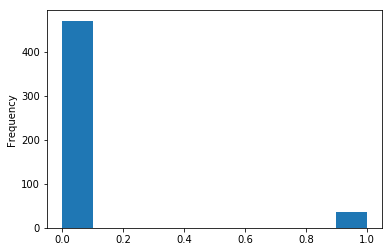

0    471
1     35
Name: CHAS, dtype: int64

0    93.083004
1     6.916996
Name: CHAS, dtype: float64

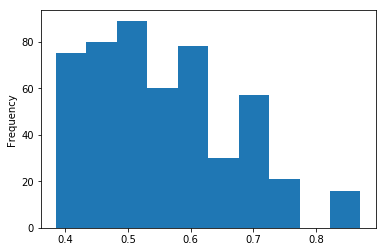

tail() of nox


0.385    1
0.394    1
0.518    1
0.422    1
0.389    1
Name: NOX, dtype: int64

0.385    0.001976
0.394    0.001976
0.518    0.001976
0.422    0.001976
0.389    0.001976
Name: NOX, dtype: float64

In [6]:
# plt.subplot(2,1,1)
case_data_Boston.CHAS.plot.hist()
plt.show()

d__ = case_data_Boston.CHAS
display(d__.value_counts())
display((d__.value_counts() / d__.value_counts().sum()) * 100)

######

# plt.subplot(2,1,2)
case_data_Boston.NOX.plot.hist()
plt.show()

d__ = case_data_Boston.NOX
print("tail() of nox")
display(d__.value_counts().tail())
display((d__.value_counts() / d__.value_counts().sum()).tail())

1. *CHAS* e uma variable binaria (0 or 1), por conta disso, saber que a classe (1) apresenta so o 0.5% do total das mostras, resulta insignificante.

2. *NOX* is a representation in Parts per 10 Million (1e7), por lo que ter um rango de valores inferior a 1 e aceitavel

**CHAS e relevante como variavel?**

CHAS CORRELATION


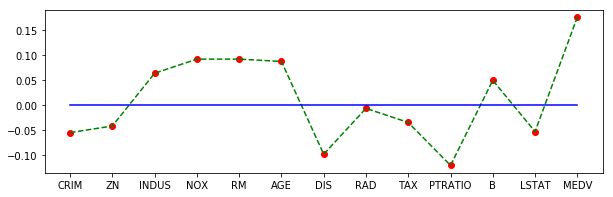

PCA


,relevance
CHAS,6.332428


In [7]:
print("CHAS CORRELATION")

corr__ = case_data_Boston.corr(method='pearson', min_periods=1)

alt_corr__ = corr__.CHAS[corr__.CHAS.index != 'CHAS']

plt.figure(figsize=(10,3))
plt.plot(alt_corr__, "or")
plt.plot(alt_corr__, "--g")
plt.plot(np.zeros(alt_corr__.shape[0]), "-b")
plt.show()

print("PCA")
t__ = (case_data_Boston - case_data_Boston.mean()) / case_data_Boston.std()

eigvals, _ = np.linalg.eig(t__.cov().values)
rel_ = pd.DataFrame(eigvals, columns=["relevance"])
rel_.index = t__.columns.tolist()

rel_.sort_values(by="relevance", inplace=True, ascending=False)

rel_ = (rel_ / rel_.sum()) * 100

display(rel_[rel_.index == 'CHAS'])

ele tem baixa correlacao com as outras variavels (perto do 0), mas ao momento de fazer o PCA, o fato dela ter um 6% de aportacao na varianca e suficiente para escolher nao fazer um re-balanceamento da variabel, neste caso, realizar um sub-amostragem e uma boa idea, mas antes, se tem que analizar os targets.

#### 1.2.2.- Making and Converting Targets

o atributo ***MEDV*** sera nosso atributo objetivo, mas ele e um atributo continuo, alem de quantitativo, se tera que mudar a um atributo qualitativo e discreto

In [8]:
targets = p_plt.make_targets(case_data_Boston.MEDV, samples=3, labels=["Low", "Med", "High"])

case_data_Boston.drop(columns=["MEDV"], inplace=True)
case_data_Boston["target"] = targets

case_data_Boston.target.value_counts()

High    170
Low     169
Med     167
Name: target, dtype: int64

as clases estao balanceadas (quase 1/3 - 1/3 - 1/3)

**pode se realizar um sub-amostragem e deletar as mostras onde o atributo CHAS e 0?**

para ter certca de que , ao momento de deletar essa mostras o espacio de dados nao muda (significativamente), e importante conhecer se as mostras tem quase a mesma distribucao de probabilidades no atributo **target** (representando assim um sub-espacio semejante)

In [9]:
case_data_Boston[case_data_Boston.CHAS == 1].target.value_counts()

High    17
Med     12
Low      6
Name: target, dtype: int64

\'e imposivel deletar essas mostras, elas tem uma distribucao de probabilidades muito similar

#### 1.2.3.- Normalization

In [10]:
target = case_data_Boston.target.copy()
case_data_Boston.drop(columns=["target"], inplace=True)

##### 1.2.3.1.- Max Possible Range in-between Values

normalizacao das columnas **TAX e B** , fazendo uso do \[0-1\] method.

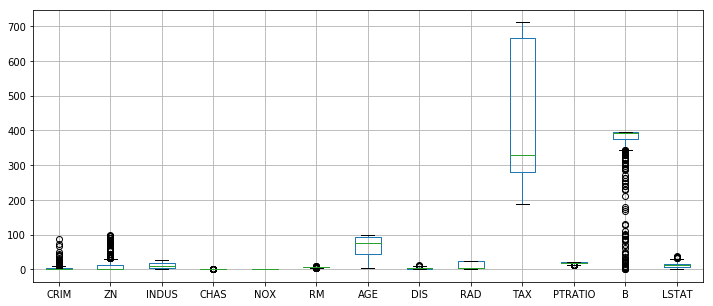

In [11]:
case_data_Boston.boxplot(figsize=(12,5))

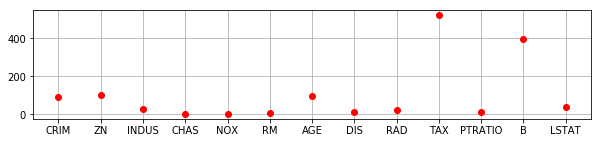

In [12]:
plt.figure(figsize=(10,2))
plt.grid()
plt.plot(case_data_Boston.max() - case_data_Boston.min(), "or")
plt.show()

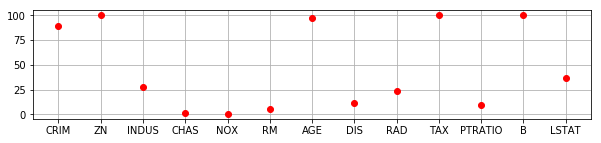

In [13]:
t__ = case_data_Boston.TAX
t__ = (t__ - t__.min()) / (t__.max() - t__.min())
t__ = t__ * 100
case_data_Boston.TAX = t__.values.copy()

t__ = case_data_Boston.B
t__ = (t__ - t__.min()) / (t__.max() - t__.min())
t__ = t__ * 100

case_data_Boston.B = t__.values.copy()

plt.figure(figsize=(10,2))
plt.grid()
plt.plot(case_data_Boston.max() - case_data_Boston.min(), "or")
plt.show()

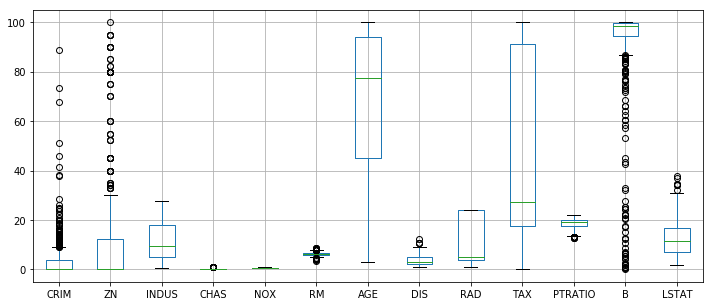

In [14]:
case_data_Boston.boxplot(figsize=(12,5))

##### 1.2.4.- Z - Score

finalmente se aplica o z-score a todos os atributos do dataset

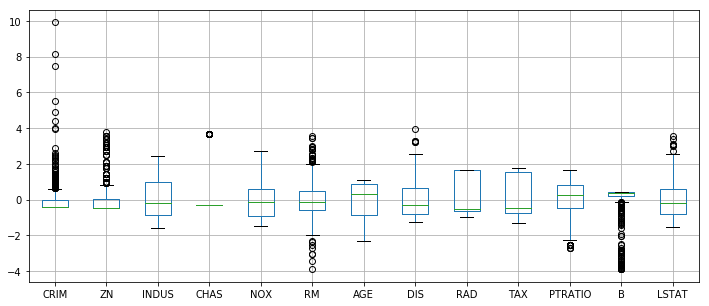

In [15]:
case_data_Boston = (case_data_Boston - case_data_Boston.mean()) / case_data_Boston.std()
case_data_Boston.boxplot(figsize=(12,5))

### 1.3 Binarization and Prediction

se escolho um **MLP** como tecnica de predicao, por isso o **target** debe de se binarizar, alem de ter os valors de entrada em forma normal (base normal)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dc5dd4e80>,
      dtype=object)

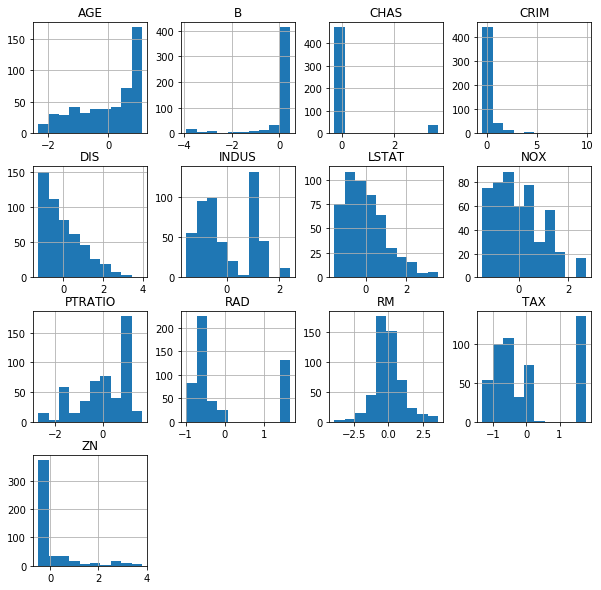

In [16]:
case_data_Boston.hist(figsize=(10,10))

In [17]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### 1.3.1 Binarizing and Training

##### 1.3.1.1 Normal Weigths

In [24]:
## Binarizing

normal_targets = label_binarize(target, classes=["Low", "Med", "High"])

x_train, x_test, y_train, y_test = train_test_split(case_data_Boston.values, normal_targets
                                                    , test_size= 0.25)

clf = MLPClassifier(hidden_layer_sizes=(10,6))

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

normal_pred = accuracy_score(y_test, y_pred)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### 1.3.1.2 Other Weigths

In [25]:
dt_bl = [target.loc[target == c].sample(n=150, replace=True) for c in target.unique()]
print('\n\nFixando o número de exemplos por classe em 150')
dt_bl = pd.concat(dt_bl)
dt_bl.value_counts()



Fixando o número de exemplos por classe em 150


Med     150
Low     150
High    150
Name: target, dtype: int64

In [26]:
## Binarizing


equal_targets = label_binarize(dt_bl, classes=["Low", "Med", "High"])

x_train, x_test, y_train, y_test = train_test_split(case_data_Boston.values, normal_targets
                                                    , test_size= 0.25)

clf = MLPClassifier(hidden_layer_sizes=(10,6))

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

equal_pred = accuracy_score(y_test, y_pred)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
prob = {"Low":0.15, "Med":0.35, "High":0.60}

dt_bl = []
for c in target.unique():
    dt_bl += [target.loc[target == c].sample(n=int(target.count() * prob[c]), replace=True)]
print("Fixando o numero de exemplos por classe seguindo as probabildades")
pprint(prob)
dt_bl = pd.concat(dt_bl)
dt_bl.value_counts()

Fixando o numero de exemplos por classe seguindo as probabildades
{'High': 0.6, 'Low': 0.15, 'Med': 0.35}


High    303
Med     177
Low      75
Name: target, dtype: int64

In [28]:
## Binarizing


equal_targets = label_binarize(dt_bl, classes=["Low", "Med", "High"])

x_train, x_test, y_train, y_test = train_test_split(case_data_Boston.values, normal_targets
                                                    , test_size= 0.25)

clf = MLPClassifier(hidden_layer_sizes=(10,6))

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

unbalance_pred = accuracy_score(y_test, y_pred)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


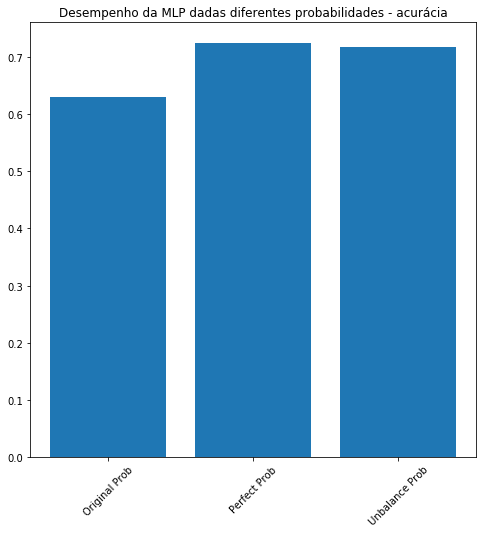

In [29]:
# faz o plot de desempenho dos classificadores
clfs_names = ["Original Prob", "Perfect Prob", "Unbalance Prob"]

plt.figure(figsize=(8,8))
plt.bar(range(1, 4), [normal_pred, equal_pred, unbalance_pred])
plt.xticks(range(1, 4), clfs_names, rotation=45)
title = "Desempenho da MLP dadas diferentes probabilidades - acurácia"
plt.title(title)
plt.show()
